In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("loan_data.csv")

In [5]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [6]:
df.shape

(614, 13)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
df["Gender"].mode()

0    Male
dtype: object

In [11]:
df["Gender"].fillna(df["Gender"].mode()[0],inplace=True)
df["Married"].fillna(df["Married"].mode()[0],inplace=True)
df["Dependents"].fillna(df["Dependents"].mode()[0],inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0],inplace=True)

df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0],inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0],inplace=True) 

In [12]:
df["LoanAmount"].fillna(df["LoanAmount"].mode()[0],inplace=True)

In [13]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df["Gender"]=df["Gender"].map({"Male":0,"Female":1})
df["Married"]=df["Married"].map({"No":0,"Yes":1})
df["Education"]=df["Education"].map({"Graduate":1,"Not Graduate":0})
df["Dependents"]=df["Dependents"].map({"0":0,"1":1,"2":2,"3+":3})
df["Self_Employed"]=df["Self_Employed"].map({"No":0,"Yes":1})
df["Property_Area"]=df["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2})
df["Loan_Status"]=df["Loan_Status"].map({"N":0,"Y":1})

In [17]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,120.0,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [18]:
df["Dependents"]=(df["Dependents"]-df["Dependents"].min())/(df["Dependents"].max()-df["Dependents"].min())

In [19]:
for i in df.columns[1:]:
  df[i]=(df[i]-df[i].min())/(df[i].max()-df[i].min())

In [20]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [21]:
df.to_csv("Loan_Status_new_value.csv",index=False)

In [22]:
new=pd.read_csv("Loan_Status_new_value.csv")

In [23]:
new.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [24]:
new.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education            float64
Self_Employed        float64
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area        float64
Loan_Status          float64
dtype: object

In [25]:
new.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
new=new.drop("Loan_ID",axis=1)

In [27]:
new.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [28]:
new.shape

(614, 12)

In [29]:
x=new.drop("Loan_Status",axis=1)
y=new["Loan_Status"]

In [30]:
x.shape,y.shape

((614, 11), (614,))

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=new["Loan_Status"],random_state=10,test_size=0.2)

In [33]:
(x_train.shape,y_train.shape),(x_test.shape,y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [34]:
import keras
from keras.models import  Sequential
from keras.layers import InputLayer,Dense

In [35]:
import tensorflow as tf

In [36]:
x_train.shape

(491, 11)

In [37]:
x_train.shape[1]

11

In [38]:
input_neuron=x_train.shape[1]

In [39]:
output_neuron=1

In [40]:
number_hidden_layer=2
neuron_hidden_layer_1=10
neuron_hidden_layer_2=5

In [41]:
model=Sequential()
model.add(InputLayer(input_shape=(input_neuron,)))
model.add(Dense(units=neuron_hidden_layer_1,activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2,activation='relu'))
model.add(Dense(units=output_neuron,activation='sigmoid'))

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [43]:
input_neuron*neuron_hidden_layer_1

110

In [44]:
input_neuron*neuron_hidden_layer_1+10

120

In [45]:
neuron_hidden_layer_1*neuron_hidden_layer_2+5

55

In [46]:
neuron_hidden_layer_2*output_neuron+1

6

In [47]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [48]:
model_history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
16/16 [==============================] - 0s 13ms/step - loss: 0.7574 - accuracy: 0.3299 - val_loss: 0.7152 - val_accuracy: 0.3902
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6805 - accuracy: 0.5845 - val_loss: 0.6616 - val_accuracy: 0.6667
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6393 - accuracy: 0.6884 - val_loss: 0.6309 - val_accuracy: 0.6748
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6884 - val_loss: 0.6166 - val_accuracy: 0.6911
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6098 - accuracy: 0.6864 - val_loss: 0.6103 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6051 - accuracy: 0.6864 - val_loss: 0.6060 - val_accuracy: 0.6911
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6016 - accuracy: 0.6864 - val_loss: 0.6020 - val_accuracy: 0.6911
Epoch 8/50
16/16 [=

In [49]:
prediction=model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [50]:
accuracy_score(y_test,prediction)

0.8130081300813008

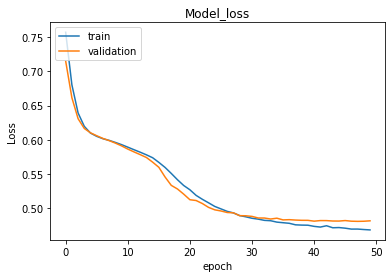

In [51]:
plt.plot(model_history.history["loss"])
plt.plot(model_history.history['val_loss'])
plt.title("Model_loss")
plt.ylabel("Loss")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()


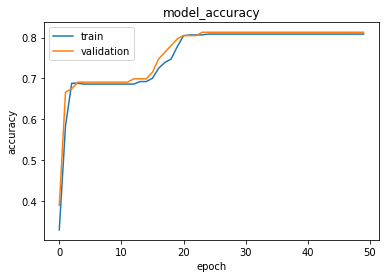

In [52]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title("model_accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train","validation"],loc="upper left")
plt.show()
